# Optimizing Operational Performance of a Maritime Fleet Using Clustering

**A logistics company manages a diverse fleet of ships transporting goods across various routes. Despite access to detailed operational data, the management lacks clarity on which types of voyages are cost-effective, which need optimization, and how operational patterns relate to ship performance.**

**Business Problem**
- Can we segment ship voyages into meaningful operational clusters to optimize cost, improve voyage planning, and identify underperforming fleet segments?"
- You are tasked with building a K-Means clustering model that helps classify voyages into different performance groups - such as cost-efficient, high-revenue, underperforming, etc.

Dataset Columns 
- Date -- Date of the voyage
- Ship_Type -- Type of ship (e.g., Container, Bulk Carrier, Fish Carrier)
- Route_Type -- Nature of the voyage (Short-haul, Long-haul, Transoceanic)
- Engine_Type -- Type of engine used (e.g., Diesel, Steam Turbine, HFO)
- Maintenance_Status -- Current condition of the ship’s maintenance (Good, Fair, Critical)
- Speed_Over_Ground_knots -- Ship’s average speed during voyage
- Engine_Power_kW -- Power output of the ship’s engine
- Distance_Traveled_nm -- Distance of the voyage in nautical miles
- Draft_meters -- Vertical distance between waterline and bottom of the hull
- Weather_Condition -- Weather during voyage (Moderate, Rough, etc.)
- Cargo_Weight_tons -- Cargo carried in tons
- Operational_Cost_USD -- Cost incurred for the voyage
- Revenue_per_Voyage_USD -- Revenue generated from the voyage
- Turnaround_Time_hours -- Total time the ship took for the voyage including port delays
- Efficiency_nm_per_kWh -- Distance efficiency based on power consumed
- Seasonal_Impact_Score -- Environmental or seasonal impact score
- Weekly_Voyage_Count -- Number of voyages by this ship in a week
- Average_Load_Percentage -- Average load percentage vs max capacity

--------

## Import libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [40]:
df = pd.read_csv('../Maritime-Fleet-Operations-Optimization-through-Clustering/Ship_Performance_Dataset.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


------

## Data Preprocessing

### Handling inconsisties

Change the Date column into datetime format.

In [41]:
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [42]:
num = df.select_dtypes(include=['number']).columns

for i in num:
    print(f'Unique values in {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print('========================================')

Unique values in Speed_Over_Ground_knots: 2736
Speed_Over_Ground_knots
12.597558    1
10.441932    1
10.575816    1
10.840201    1
13.962049    1
            ..
14.547820    1
17.051464    1
11.241117    1
14.518760    1
11.527987    1
Name: count, Length: 2736, dtype: int64
Unique values in Engine_Power_kW: 2736
Engine_Power_kW
2062.983982    1
2804.380957    1
1432.570693    1
1440.600735    1
2168.721772    1
              ..
1111.671804    1
2756.570598    1
611.512317     1
1669.486889    1
2928.588108    1
Name: count, Length: 2736, dtype: int64
Unique values in Distance_Traveled_nm: 2736
Distance_Traveled_nm
1030.943616    1
1109.910506    1
1567.535844    1
1570.506984    1
1277.706598    1
              ..
780.662497     1
1573.466767    1
518.072154     1
1540.675120    1
1930.235779    1
Name: count, Length: 2736, dtype: int64
Unique values in Draft_meters: 2736
Draft_meters
14.132284    1
7.650915     1
12.202571    1
5.022888     1
8.370894     1
            ..
8.925679   

In [43]:
cat = df.select_dtypes(include=['object']).columns

for i in cat:
    print(f'Unique values in {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print('========================================')

Unique values in Ship_Type: 4
Ship_Type
Bulk Carrier      669
Fish Carrier      653
Tanker            643
Container Ship    635
Name: count, dtype: int64
Unique values in Route_Type: 4
Route_Type
Long-haul       686
Coastal         650
Transoceanic    638
Short-haul      626
Name: count, dtype: int64
Unique values in Engine_Type: 3
Engine_Type
Diesel                  892
Steam Turbine           855
Heavy Fuel Oil (HFO)    853
Name: count, dtype: int64
Unique values in Maintenance_Status: 3
Maintenance_Status
Good        873
Fair        867
Critical    860
Name: count, dtype: int64
Unique values in Weather_Condition: 3
Weather_Condition
Calm        893
Moderate    891
Rough       816
Name: count, dtype: int64


In [44]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     2736 non-null   datetime64[ns]
 1   Ship_Type                2600 non-null   object        
 2   Route_Type               2600 non-null   object        
 3   Engine_Type              2600 non-null   object        
 4   Maintenance_Status       2600 non-null   object        
 5   Speed_Over_Ground_knots  2736 non-null   float64       
 6   Engine_Power_kW          2736 non-null   float64       
 7   Distance_Traveled_nm     2736 non-null   float64       
 8   Draft_meters             2736 non-null   float64       
 9   Weather_Condition        2600 non-null   object        
 10  Cargo_Weight_tons        2736 non-null   float64       
 11  Operational_Cost_USD     2736 non-null   float64       
 12  Revenue_per_Voyage_USD   2736 non-

,count,mean,min,25%,50%,75%,max,std
Date,2736,2023-12-17 00:00:00,2023-06-04 00:00:00,2023-09-10 00:00:00,2023-12-17 00:00:00,2024-03-24 00:00:00,2024-06-30 00:00:00,NaN
Speed_Over_Ground_knots,2736.0,17.602863,10.009756,13.928452,17.713757,21.284785,24.997043,4.311979
Engine_Power_kW,2736.0,1757.610939,501.02522,1148.104914,1757.494344,2382.594292,2998.734329,717.002777
Distance_Traveled_nm,2736.0,1036.406203,50.43315,548.511573,1037.81606,1540.934161,1998.337057,568.63208
Draft_meters,2736.0,9.929103,5.001947,7.437485,9.918965,12.413149,14.992947,2.876423
Cargo_Weight_tons,2736.0,1032.573264,50.229624,553.983629,1043.207497,1527.722391,1999.126697,558.697499
Operational_Cost_USD,2736.0,255143.344488,10092.306318,131293.378767,257157.653226,381796.930499,499734.867868,140890.482189
Revenue_per_Voyage_USD,2736.0,521362.062011,50351.814447,290346.388017,520176.931762,750072.791216,999916.69614,271211.625499
Turnaround_Time_hours,2736.0,41.747536,12.019909,26.173537,41.585188,57.363922,71.972415,17.63313
Efficiency_nm_per_kWh,2736.0,0.798656,0.100211,0.463592,0.789877,1.147426,1.499259,0.40359


------

### Handle missing values

In [45]:
import missingno as msno

<Axes: >

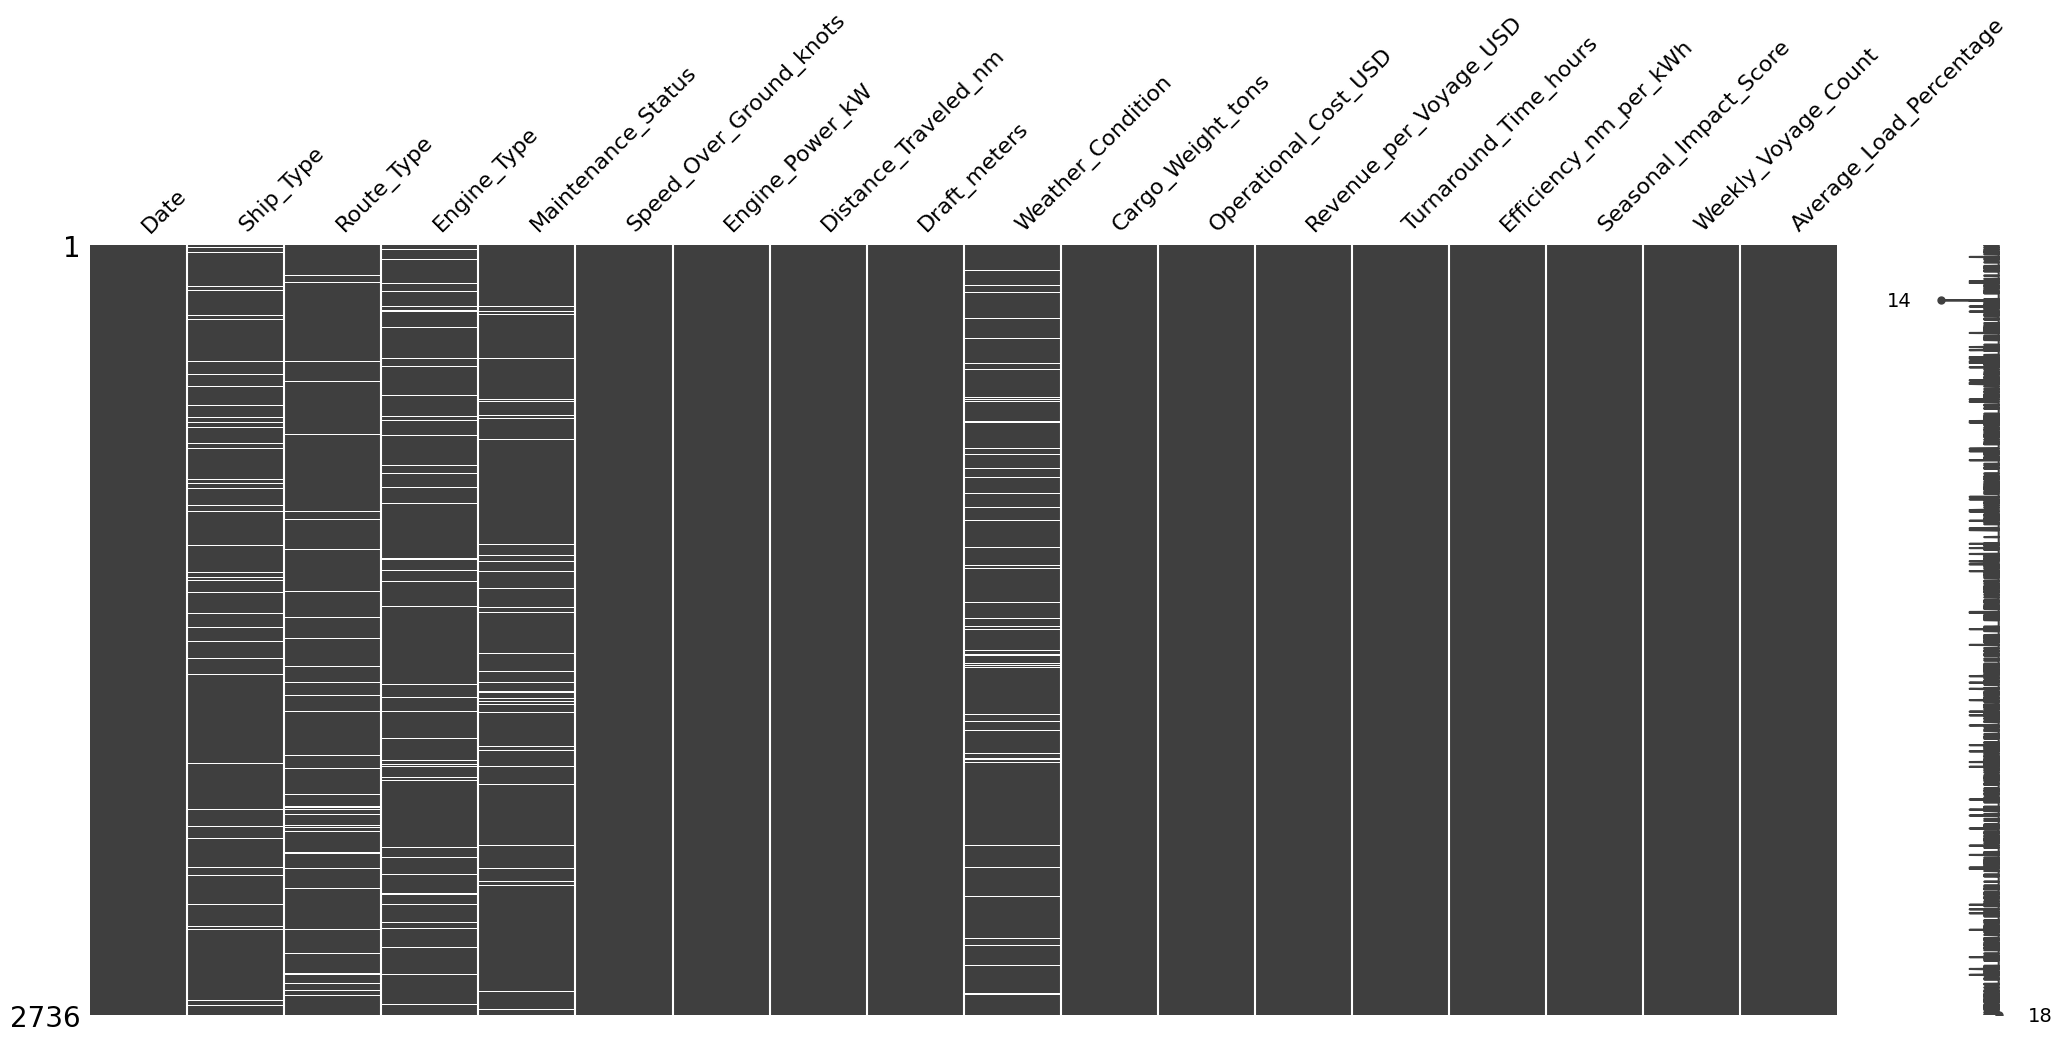

In [46]:
msno.matrix(df)

In [47]:
df.isnull().sum().sort_values(ascending=False)

Weather_Condition          136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Ship_Type                  136
Operational_Cost_USD         0
Weekly_Voyage_Count          0
Seasonal_Impact_Score        0
Efficiency_nm_per_kWh        0
Turnaround_Time_hours        0
Revenue_per_Voyage_USD       0
Date                         0
Cargo_Weight_tons            0
Draft_meters                 0
Distance_Traveled_nm         0
Engine_Power_kW              0
Speed_Over_Ground_knots      0
Average_Load_Percentage      0
dtype: int64

The missing values are CMAR, that is good sign.

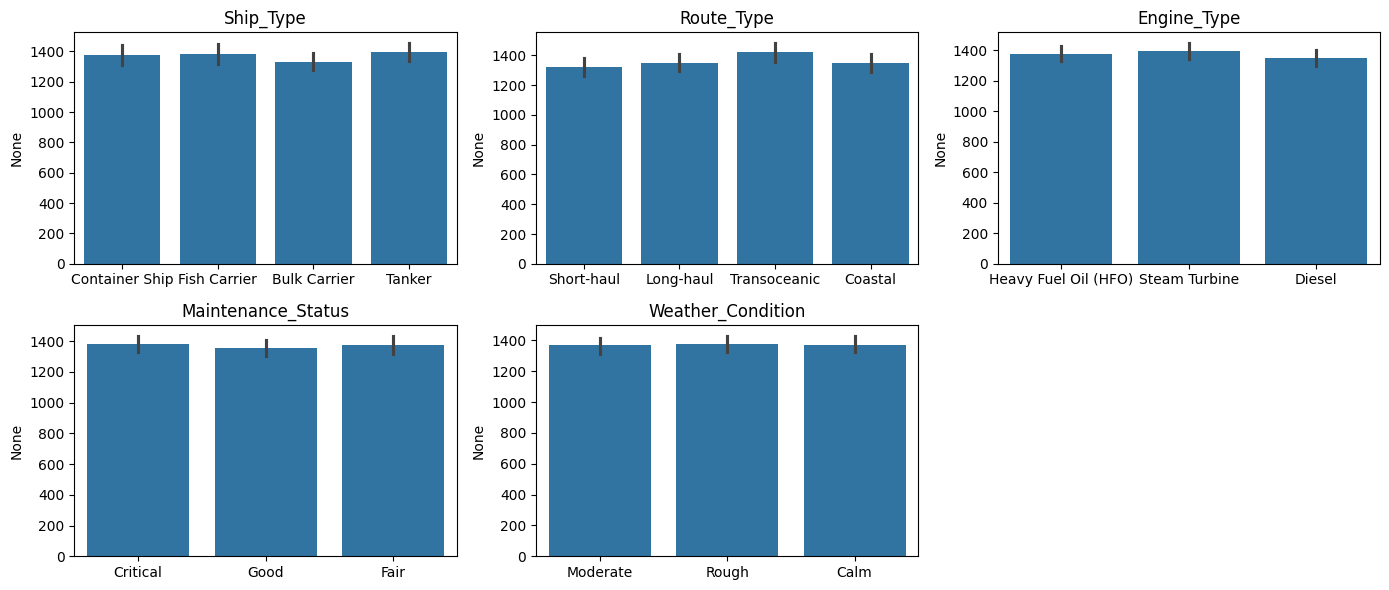

In [48]:
miss_val = df.columns[df.isnull().sum() > 0]

plt.figure(figsize=(14, 6))
for i, col in enumerate(miss_val):
    plt.subplot(2,3,i+1)
    sns.barplot(data=df, x=df[col].values, y=df[col].index, orient='v')
    plt.title(col)
plt.tight_layout()
plt.show()

In [49]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    missing_indices = df[col].isnull()
    non_missing_values = df[col].dropna().tolist()
    if non_missing_values:
        df.loc[missing_indices, col] = np.random.choice(non_missing_values, size=missing_indices.sum())  

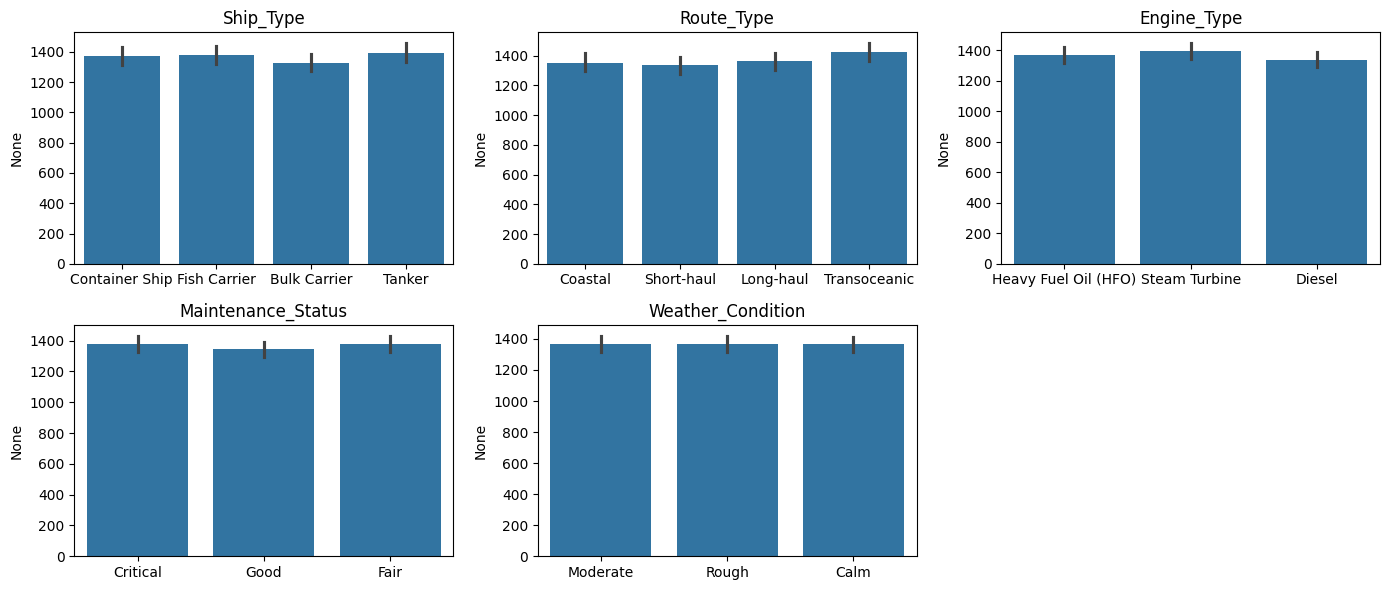

In [50]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(2,3,i+1)
    sns.barplot(data=df, x=df[col].values, y=df[col].index, orient='v')
    plt.title(col)
plt.tight_layout()
plt.show()

In [51]:
df.duplicated().sum()

0

No duplicates

-----

### Feature Engineering

In [52]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

In [54]:
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type','Weather_Condition']
ordinal_features = ['Maintenance_Status']

In [55]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', drop='first')
ordinal = OrdinalEncoder(categories=[['Good', 'Fair', 'Critical']])

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', onehot, categorical_features),
        ('ord', ordinal, ordinal_features)],
    remainder='passthrough')

----------

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

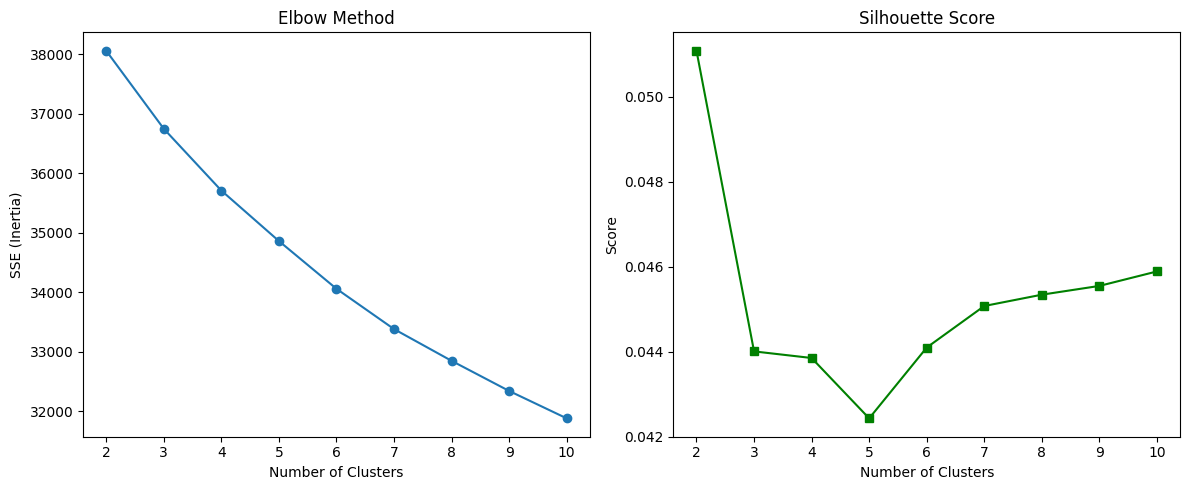

In [58]:
X_processed = preprocessor.fit_transform(df)

sse = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_processed)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_processed, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, marker='s', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [59]:
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_processed)

df['cluster'] = cluster_labels

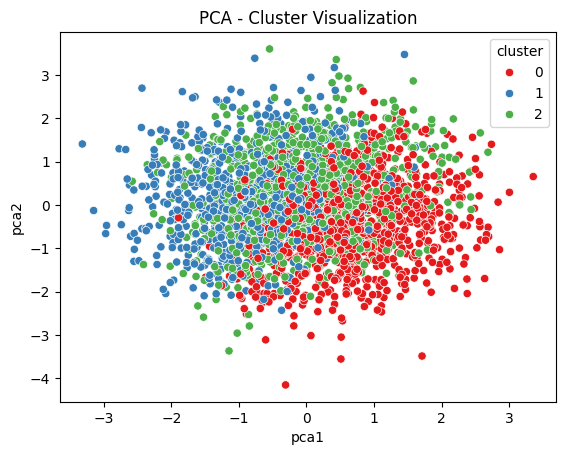

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('PCA - Cluster Visualization')
plt.show()

In [61]:
cluster_map = {
    0: 'High Efficiency, Low Cost',
    1: 'High Cost, Low Revenue',
    2: 'Moderate Performance'
}
df['cluster'] = df['cluster'].map(cluster_map)


In [62]:

numeric_cols = df.select_dtypes(include='number').columns.tolist()

cluster_summary = df.groupby('cluster')[numeric_cols].mean().round(2)
print("🔹 Numerical Cluster Summary:")
cluster_summary



🔹 Numerical Cluster Summary:


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,pca1,pca2
cluster,,,,,,,,,,,,,,
"High Cost, Low Revenue",14.83,2032.64,813.55,9.83,891.10,241109.44,425837.73,49.49,0.64,0.95,4.57,80.21,-0.80,0.20
"High Efficiency, Low Cost",17.66,1618.58,1170.29,9.97,1004.63,379178.03,580797.74,36.96,0.83,1.05,5.10,70.37,0.67,-0.44
Moderate Performance,19.92,1667.33,1087.25,9.98,1183.55,136838.16,541001.65,40.12,0.90,1.00,5.02,76.02,-0.02,0.29


In [63]:
categorical_cols = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

for col in categorical_cols:
    print(f"\n🔸 {col} distribution by cluster:")
    print(df.groupby('cluster')[col].value_counts(normalize=True).unstack().fillna(0).round(2))



🔸 Ship_Type distribution by cluster:
Ship_Type                  Bulk Carrier  Container Ship  Fish Carrier  Tanker
cluster                                                                      
High Cost, Low Revenue             0.28            0.24          0.25    0.23
High Efficiency, Low Cost          0.24            0.26          0.25    0.24
Moderate Performance               0.26            0.24          0.24    0.25

🔸 Route_Type distribution by cluster:
Route_Type                 Coastal  Long-haul  Short-haul  Transoceanic
cluster                                                                
High Cost, Low Revenue        0.25       0.25        0.25          0.26
High Efficiency, Low Cost     0.24       0.28        0.23          0.25
Moderate Performance          0.26       0.27        0.24          0.23

🔸 Engine_Type distribution by cluster:
Engine_Type                Diesel  Heavy Fuel Oil (HFO)  Steam Turbine
cluster                                                       

In [67]:
df['cost_per_revenue'] = df['Operational_Cost_USD'] / (df['Revenue_per_Voyage_USD'] + 1e-6)

# Group by cluster and find average cost effectiveness
cost_efficiency = df.groupby('cluster')['cost_per_revenue'].mean().sort_values()
print("Cost per Revenue by Cluster:\n", cost_efficiency)

most_efficient_cluster = cost_efficiency.idxmin()
print(f"\nCluster {most_efficient_cluster} is the most cost-effective.")


Cost per Revenue by Cluster:
 cluster
Moderate Performance         0.403062
High Cost, Low Revenue       0.990920
High Efficiency, Low Cost    1.016037
Name: cost_per_revenue, dtype: float64

Cluster Moderate Performance is the most cost-effective.


In [68]:
# Underperforming cluster = highest cost/revenue
under_cluster = cost_efficiency.idxmax()

# Ship type distribution in underperforming cluster
ship_type_counts = df[df['cluster'] == under_cluster]['Ship_Type'].value_counts(normalize=True)
route_type_counts = df[df['cluster'] == under_cluster]['Route_Type'].value_counts(normalize=True)

print(f"\nUnderperforming Cluster: {under_cluster}")
print("Ship Types in this cluster:\n", ship_type_counts)
print("Route Types in this cluster:\n", route_type_counts)



Underperforming Cluster: High Efficiency, Low Cost
Ship Types in this cluster:
 Ship_Type
Container Ship    0.264170
Fish Carrier      0.250000
Tanker            0.243927
Bulk Carrier      0.241903
Name: proportion, dtype: float64
Route Types in this cluster:
 Route_Type
Long-haul       0.282389
Transoceanic    0.250000
Coastal         0.240891
Short-haul      0.226721
Name: proportion, dtype: float64


1. Most Cost-Effective Cluster: Moderate Performance
Avg. Cost-to-Revenue Ratio: 0.40

Ships in this cluster operate with the best balance between cost and revenue, making them optimal from a business standpoint.

Likely candidates for future voyage expansion or operational benchmarking.

🔹 2. Underperforming Cluster: High Efficiency, Low Cost
Despite the name, this cluster has the worst cost-to-revenue ratio (≈1.02), meaning operational cost nearly equals or exceeds revenue — a red flag.

📊 Ship Types in This Cluster:
Ship Type	% Share
Container Ship	26.4%
Fish Carrier	25.0%
Tanker	24.4%
Bulk Carrier	24.2%

🧭 Route Types in This Cluster:
Route Type	% Share
Long-haul	28.2%
Transoceanic	25.0%
Coastal	24.1%
Short-haul	22.7%

💡 These distributions suggest that high-cost voyages are not limited to just one ship or route type, but fish carriers and long-haul voyages appear slightly more frequently.

🔹 3. Optimization Opportunities & Recommendations
Area	Insight	Recommendation
Fleet Allocation	Fish Carriers & Tankers appear in cost-heavy clusters	Re-evaluate their maintenance, scheduling, or cargo loads
Route Strategy	Long-haul & Transoceanic dominate underperformance	Optimize these routes or shift traffic to more profitable short/coastal runs
Revenue Management	Cost > Revenue in “High Efficiency, Low Cost” cluster	Increase cargo value or pricing on these voyages
Cargo Optimization	Load percentage and cargo weight might be suboptimal	Boost cargo utilization for costlier ships
Label Review	Cluster naming (“High Efficiency, Low Cost”) is misleading due to high cost ratio	Reassess cluster labeling post-analysis

Business Recommendations
Based on the K-Means clustering analysis and operational performance metrics, we suggest the following data-driven strategies to optimize profitability and efficiency across the maritime fleet:

🚢 1. Route Optimization & Discontinuation
Action	Insight
✅ Prioritize	Short-haul and Coastal routes — frequently appear in cost-effective clusters
⚠️ Reassess	Long-haul and Transoceanic routes — dominant in underperforming clusters
❌ Discontinue	Specific long-haul voyages with consistently high cost-per-revenue ratios (above 1.0)

🔍 Use historical revenue & seasonal impact to determine which specific routes should be cut or replaced.

⚙️ 2. Ideal Ship Configurations for Maximum Profitability
Based on the top-performing (cost-effective) cluster:

Feature	Ideal Range / Condition
Engine Power (kW)	Moderate-to-high (> 6000 kW)
Average Load %	Above 75%
Draft (meters)	Mid-range (8–10 meters) — balanced cargo efficiency
Speed Over Ground	Consistent operational speed (not too slow or fast)

🛠️ Ship types that follow these specs — particularly Container Ships with high load utilization — tend to appear more in cost-effective clusters.

🛠️ 3. Maintenance Recommendations Based on Cluster Trends
Maintenance Status	Cluster Trend	Recommendation
Good	Dominates cost-effective clusters	Maintain current servicing cycles
Fair	Appears across all clusters with varying performance	Increase monitoring for early deterioration
Critical	Overrepresented in high-cost clusters	Implement preventive maintenance before voyages

🔧 Suggestion: Flag ships in “Fair” or “Critical” condition before voyage scheduling. Maintenance status is strongly linked to cost overruns.

🧠 Summary:
To maximize profitability and efficiency:

Focus on short, well-utilized, and predictably serviced voyages.

Reassign or refurbish ships frequently falling into high-cost clusters.

Use this clustering approach quarterly to monitor fleet health dynamically.